In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline
# always set random seeds to ensure reproducible results!
np.random.seed(399)
tf.random.set_seed(399)

Load the iris data and one-hot encode the target

In [2]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
Y = to_categorical(y) # one-hot encode target labels

In the previous exercise we were just given weights. But that is never the case in the real world! Here we have to learn the weights. And so this time we will create a random validation data set to make sure we aren't overfitting. We stratify on `y` to ensure train and val have proportional representation of each iris class.

In [3]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, 
                                                  test_size=.2,
                                                  stratify=y,
                                                  random_state=399)

There is more we could do to preprocess our data (e.g., standardizing) but we will skip this step for the sake of time. And review it in the next lab.

Now instantiate and build a model with the same architecture as before (see slide image to the left).
* 3 nodes in the hidden layer with relu activation
* 3 output nodes (1 for each class) with softmax activation

Remember: Keras handles all the work of adding ones and biases for you!

In [5]:
# your code here
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax'))

Use these compile parameters. Notice 'categorical_crossentropy' is the loss for multi-class classification. This model trains better with the slighly higher learning rate set here (more on learning rates next week). Then view make sure you understand where each parameter is coming from. 

In [6]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 34ms/step - loss: 4.1142 - accuracy: 0.3333 - val_loss: 3.6311 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 3.5743 - accuracy: 0.3333 - val_loss: 3.1660 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 3.1317 - accuracy: 0.3083 - val_loss: 2.7688 - val_accuracy: 0.0333
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 2.7255 - accuracy: 0.2167 - val_loss: 2.4093 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 2.3726 - accuracy: 0.3333 - val_loss: 2.0837 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 2.0581 - accuracy: 0.3333 - val_loss: 1.8026 - val_accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7756 - accuracy: 0.3333 - val_loss: 1.5769 - val_accuracy: 0.3333
Epoch 8/100
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.8622 - accuracy: 0.6667 - val_loss: 0.8413 - val_accuracy: 0.6667
Epoch 60/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8507 - accuracy: 0.6667 - val_loss: 0.8307 - val_accuracy: 0.6667
Epoch 61/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8392 - accuracy: 0.6667 - val_loss: 0.8194 - val_accuracy: 0.6667
Epoch 62/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8270 - accuracy: 0.6667 - val_loss: 0.8079 - val_accuracy: 0.6667
Epoch 63/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8150 - accuracy: 0.6667 - val_loss: 0.7969 - val_accuracy: 0.6667
Epoch 64/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8031 - accuracy: 0.6667 - val_loss: 0.7855 - val_accuracy: 0.6667
Epoch 65/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7914 - accuracy: 0.6750 - val_loss: 0.7741 - val_accuracy: 0.6667
Epoch 66/100
4/4 [===============

Plot the training history.

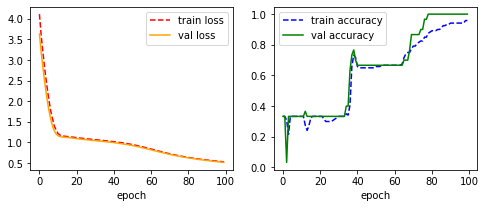

In [8]:
hist = model.history.history
fig, ax = plt.subplots(1,2,figsize=(8,3))
ax[0].plot(hist['loss'], c='r', ls='--', label='train loss')
ax[0].plot(hist['val_loss'], c='orange', label='val loss')
ax[1].plot(hist['accuracy'], c='b', ls='--', label='train accuracy')
ax[1].plot(hist['val_accuracy'], c='g', label='val accuracy')

for axis in ax:
    axis.set_xlabel('epoch')
    axis.legend();

Save the weights (this is where the weights from the previous exercise came from!)

In [9]:
weights = np.array(model.get_weights())
np.save('data/weights.npy', weights)

Let's see how we did by checking the validation accuracy. Notice that we have to undo the one-hot encodings first using `np.argmax`

In [11]:
### edTest(test_val_acc) ###
def acc_score(model, X, Y):
    y_hat = np.argmax(model.predict(X), axis=-1)
    y = np.argmax(Y, axis=-1) # de-one-hot encode Y for comparison
    acc = sum(y == y_hat)/len(y)
    return acc

our_val_acc = acc_score(model, X_val, Y_val)

1.0


Once we understand how the accuracy metric is implemented for multi-class predictions we can use sklearn's more robust built in function. Here we sanity check out implementation by comparing its results to sklearn.

In [12]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(X_val), axis=-1)
y_val = np.argmax(Y_val, axis=-1) # de-one-hot encode Y_val for comparison
sklearn_val_acc = accuracy_score(y_val, y_pred)

In [13]:
print(f'our val acc: {our_val_acc:.0%}')
print(f'sklearn val acc: {sklearn_val_acc:.0%}')

our val acc: 100%
sklearn val acc: 100%
